<h1 align="center">Volume 4: Inverse Problems.</h1>

    Jane Emeline Slagle
    Section 1
    2/9/23

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [2]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and their initial slopes.
What initial values $s_0, s_1$ did you use to find them?

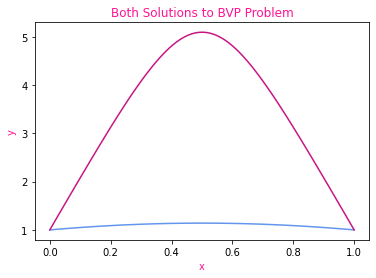

In [3]:
# Define the ODE right-hand side
def ode(x, y):
    return np.array([
        y[1],            #y format is Y = [y,y',z,z'] so want y[1] here
        -np.exp(y[0]-1)  #and want y[0] only down here
    ])

# Endpoint values
a = 0
b = 1
alpha = 1
beta = 1

# Define a residual function
def residual(s):
    # Find the right endpoint
    sol = solve_ivp(ode, (a, b), [alpha, s])
    yb = sol.y[0,-1]
    return yb - beta

# Find the right value of s using the secant method:
#have 2 solutions
s1 = secant_method(residual, (beta-alpha)/2, -1)  #get 1st sol, use s0 and s1 they gave us
s2 = secant_method(residual, 4, 8)                #get 2nd sol, use random s0 and s1 of 4, 8 to see if works

# Compute and plot the solution for s1
x1 = np.linspace(0,1,100)
y1 = solve_ivp(ode, (a,b), (alpha, s1), t_eval=x1).y[0]

#compute and plot the solution for s2
x2 = np.linspace(0,1,100)
y2 = solve_ivp(ode, (a,b), (alpha, s2), t_eval=x2).y[0]

plt.plot(x1, y1, color = "cornflowerblue")
plt.plot(x2, y2, color = "mediumvioletred")
plt.title("Both Solutions to BVP Problem", color = "deeppink")
plt.xlabel("x", color = "deeppink")
plt.ylabel("y", color = "deeppink")

plt.show()

# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

In [32]:
#define the ODE eq. have:
def ode(x, y):
    return np.array([
        y[1],              #y'
        3+(2*y[0]/x**2),   #y''
        y[3],              #z'
        y[2]*(2/(x**2))    #z'' can solve for z'' in z'' eq. given on pg 141 in lab manual, y[2] is z here
    ])

#get the endpt values:
a = 1
b = np.exp(1)
alpha = 6
beta = np.exp(1)**2 + (6/np.exp(1))

#similar residual func as one have in prob 1: 
def residual(s):
    #want return y(b,sn) - beta / z(b,sn) given in s_n+1 eq. in lab manual:
    sol = solve_ivp(ode, (a, b), [alpha, s, 0, 1])  #get IVP sol, need all 4 variables here
    
    #need get yb, zb simultaneously!
    yb = sol.y[0, -1]      #have y[0] bc y[0] gives us y, have -1 bc says take the last thing there
    zb = sol.y[2, -1]      #have y[2] bc y[2] gives us z
    
    return (yb- beta)/zb   

#want to solve BVP w/ Newton's method so make a Newton's method function:
def newtons_method(residual, y0, max_iter = 100):   #take function residual, init guess y0
    #update w/ y0 minus residual and update y0 to be y1 for the next round:
    for i in range(max_iter):   #loop through and do for all n have
        y1 = y0 - residual(y0)
        y0 = y1
    
    return y1

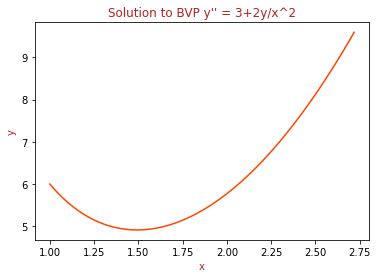

In [31]:
#find right value of s using newtons method:
s12 = newtons_method(residual, 3)     #use newtons method to get solution here: use any random initial guess
                                
#compute and plot the solution for s12
x12 = np.linspace(1,np.exp(1),100)
y12 = solve_ivp(ode, (a,b), (alpha, s12, 0, 1), t_eval=x12).y[0]

plt.plot(x12, y12, color = "orangered")
plt.title("Solution to BVP y'' = 3+2y/x^2", color = "firebrick")
plt.xlabel("x", color = "firebrick")
plt.ylabel("y", color = "firebrick")

plt.show()

# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

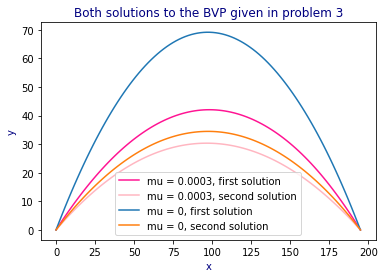

In [21]:
#FIRST get the 2 solutions for when mu = 0.0003:

#get all endpt values have:
a = 0
b = 195
alpha = 0
beta = 0
g = 9.8067
mu = 0.0003
m = 60
v = 45

#define ODE have here:
def ode(x, y):
    return np.array([
        np.tan(y[2]),   #dy/dx
        -((g*np.sin(y[2])) + (mu*(y[1])**2))/(y[1]*np.cos(y[2])),  #dv/dx
        -g/(y[1]**2)    #dtheta/dx
    ])

#define residual function for this now: have same residual function as prob 1, but need v in solve_ivp now
def residual(s):
    sol = solve_ivp(ode, (a,b), [alpha, v, s])
    yb = sol.y[0,-1]
    return yb-beta

#use secant method to find initial values for theta:
s3 = secant_method(residual, (beta-alpha)/2, -1)   #use same initial guess as prob 1

#compute and plot both solutions for mu = 0.0003 stuff:
x3 = np.linspace(a, b, 100)
y3 = solve_ivp(ode, (a,b), (alpha, v, s3), t_eval = x3).y[0]
plt.plot(x3, y3, label = "mu = 0.0003, first solution", color = "deeppink")

s4 = secant_method(residual, (beta-alpha)/2, 9)  #use different guess for the second solution
y4 = solve_ivp(ode, (a,b), (alpha, v, s4), t_eval = x3).y[0]
plt.plot(x3, y4, label = "mu = 0.0003, second solution", color = "lightpink")

#now do everything for mu = 0:
#define all endpts again:
a2 = 0
b2 = 195
alpha2 = 0
beta2 = 0
g2 = 9.8067
mu2 = 0
m2 = 60
v2 = 45

#define ODE:
def ode(x, y):
    return np.array([
        np.tan(y[2]),   #dy/dx
        -((g2*np.sin(y[2])) + (mu2*(y[1])**2))/(y[1]*np.cos(y[2])),  #dv/dx
        -g2/(y[1]**2)    #dtheta/dx
    ])

#define residual func:
def residual(s):
    sol = solve_ivp(ode, (a2,b2), [alpha2, v2, s])
    yb = sol.y[0, -1]
    return yb - beta

#find value of theta using secant method:
s5 = secant_method(residual, (beta2-alpha2)/2, 1)

#compute and plot 1st solution for mu = 0:
x5 = np.linspace(a2, b2, 100)
y5 = solve_ivp(ode, (a2, b2), (alpha2, v2, s5), t_eval = x5).y[0]
plt.plot(x5, y5, label = "mu = 0, first solution")

#compute and plot 2nd solution for mu = 0:
s6 = secant_method(residual, (beta2 - alpha2)/2, 9)
y6 = solve_ivp(ode, (a2, b2), (alpha2, v2, s6), t_eval = x5).y[0]
plt.plot(x5, y6, label = "mu = 0, second solution")

plt.title("Both solutions to the BVP given in problem 3", color = "navy")
plt.xlabel("x", color = "navy")
plt.ylabel("y", color = "navy")
plt.legend(loc = "best")
plt.show()